In [12]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

### I) Define a function named *get_lower_and_upper_bounds* that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [17]:
def get_lower_and_upper_bounds(series, method = 'iqr', multiplier = 1.5):
    if method == 'iqr':
        iqr_range = series.quantile(.75)-series.quantile(.25)
        lower_bound = series.quantile(.25) - (iqr_range * multiplier)
        upper_bound = series.quantile(.75) + (iqr_range * multiplier)
    elif method == 'std':
        sigma = series.std()
        mu = series.mean()
        lower_bound = mu - (sigma * multiplier)
        upper_bound = mu + (sigma * multiplier)
    return lower_bound,upper_bound

1) Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
lemon = pd.read_csv('lemonade.csv')
lemon.columns = [col.lower() for col in lemon]
lemon.date = pd.to_datetime(lemon.date)
lemon.head()

,date,day,temperature,rainfall,flyers,price,sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


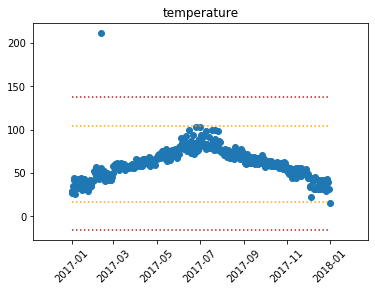

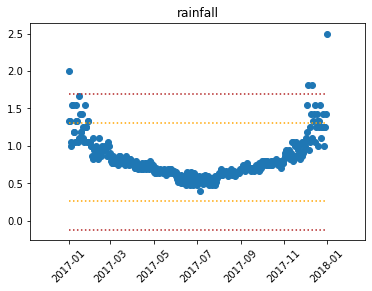

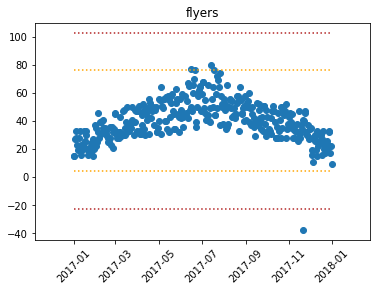

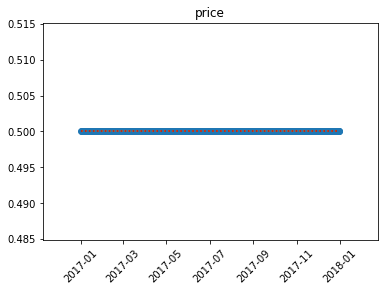

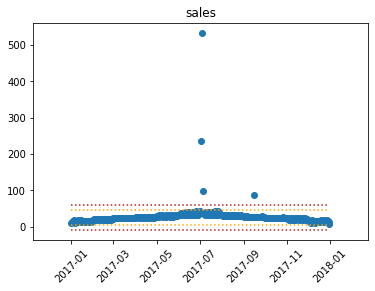

In [4]:
for col in lemon.select_dtypes([float,int]).columns:
    plt.scatter(x = lemon.date, y = lemon[col])
    
    low,high = get_lower_and_upper_bounds(lemon[col])
    low2,high2 = get_lower_and_upper_bounds(lemon[col], multiplier=3)
    plt.hlines(low, xmin= '2017-01-01', xmax='2017-12-31', linestyles=':', colors='orange')
    plt.hlines(high, xmin= '2017-01-01', xmax='2017-12-31', linestyles=':', colors='orange')
    plt.hlines(low2, xmin= '2017-01-01', xmax='2017-12-31', linestyles=':', colors='firebrick')
    plt.hlines(high2, xmin= '2017-01-01', xmax='2017-12-31', linestyles=':', colors='firebrick')
    
    plt.title(col)
    plt.xticks(rotation = 45)
    plt.show()

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [5]:
for col in lemon.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(lemon[col])
    print(col)
    print(lemon[col][(lemon[col] < lower)], '\n')

temperature
364    15.1
Name: temperature, dtype: float64 

rainfall
Series([], Name: rainfall, dtype: float64) 

flyers
324   -38
Name: flyers, dtype: int64 

price
Series([], Name: price, dtype: float64) 

sales
Series([], Name: sales, dtype: int64) 



> low temperature may be valid, but negative value of fliers is an anomaly

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [6]:
for col in lemon.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(lemon[col])
    print(col)
    print(lemon[col][(lemon[col] > upper)], '\n')

temperature
41    212.0
Name: temperature, dtype: float64 

rainfall
0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: rainfall, dtype: float64 

flyers
166    77
194    80
Name: flyers, dtype: int64 

price
Series([], Name: price, dtype: float64) 

sales
183    235
184    534
185     99
258     87
Name: sales, dtype: int64 



> Temperature is definately an anomaly, sales probably are too, but I can't say for sure. Fliers and rainfall look like legit outliers

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [7]:
for col in lemon.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(lemon[col], multiplier=3)
    print(col)
    print(lemon[col][(lemon[col] < lower)], '\n')

temperature
Series([], Name: temperature, dtype: float64) 

rainfall
Series([], Name: rainfall, dtype: float64) 

flyers
324   -38
Name: flyers, dtype: int64 

price
Series([], Name: price, dtype: float64) 

sales
Series([], Name: sales, dtype: int64) 



> same reaction, fliers are definitely anomolus

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [8]:
for col in lemon.select_dtypes([int,float]).columns:
    lower,upper = get_lower_and_upper_bounds(lemon[col], multiplier=3)
    print(col)
    print(lemon[col][(lemon[col] > upper)], '\n')

temperature
41    212.0
Name: temperature, dtype: float64 

rainfall
0      2.00
338    1.82
343    1.82
364    2.50
Name: rainfall, dtype: float64 

flyers
Series([], Name: flyers, dtype: int64) 

price
Series([], Name: price, dtype: float64) 

sales
183    235
184    534
185     99
258     87
Name: sales, dtype: int64 



> Temperature is an anomoly

2) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:



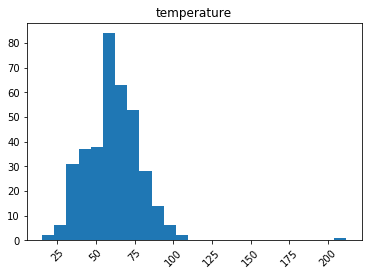

p value: 1.8322809361339537e-13


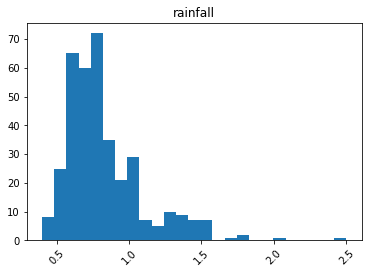

p value: 3.751794714290933e-18


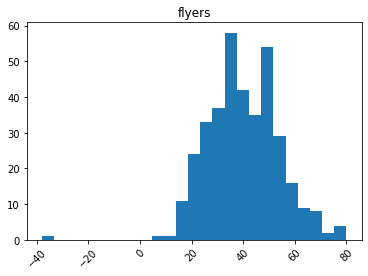

p value: 5.3233948165143374e-06


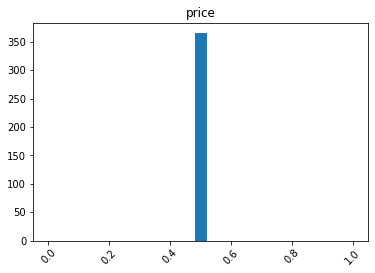

p value: 1.0


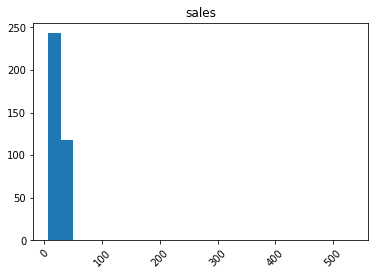

p value: 1.1644224338167397e-36


In [15]:
for col in lemon.select_dtypes([float,int]).columns:
    plt.hist(lemon[col], bins = 25)        
    plt.title(col)
    plt.xticks(rotation = 45)
    plt.show()
    print(f'p value: {shapiro(lemon[col])[1]}')

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [21]:
for col in lemon.select_dtypes([int,float]).columns:
    if shapiro(lemon[col])[1] < .05:
        lower,upper = get_lower_and_upper_bounds(lemon[col], method='std' ,multiplier=2)
        print(col)
        print('~low values~')
        print(lemon[col][(lemon[col] < lower)])
        print('~high values~')
        print(lemon[col][(lemon[col] > upper)], '\n')
    else:
        print(col)
        print('not normally distributed\n')

temperature
~low values~
338    22.0
364    15.1
Name: temperature, dtype: float64
~high values~
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
Name: temperature, dtype: float64 

rainfall
~low values~
Series([], Name: rainfall, dtype: float64)
~high values~
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: rainfall, dtype: float64 

flyers
~low values~
324   -38
338    11
364     9
Name: flyers, dtype: int64
~high values~
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
Name: flyers, dtype: int64 

price
not normally distributed

sales
~low values~
Series([], Name: sales, dtype: int64)
~high values~
183    235
184    534
185     99
Name: sales, dtype: int64 



> My reactions have not changed

In [22]:
for col in lemon.select_dtypes([int,float]).columns:
    if shapiro(lemon[col])[1] < .05:
        lower,upper = get_lower_and_upper_bounds(lemon[col], method='std' ,multiplier=3)
        print(col)
        print('~low values~')
        print(lemon[col][(lemon[col] < lower)])
        print('~high values~')
        print(lemon[col][(lemon[col] > upper)], '\n')
    else:
        print(col)
        print('not normally distributed\n')

temperature
~low values~
Series([], Name: temperature, dtype: float64)
~high values~
41    212.0
Name: temperature, dtype: float64 

rainfall
~low values~
Series([], Name: rainfall, dtype: float64)
~high values~
0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: rainfall, dtype: float64 

flyers
~low values~
324   -38
Name: flyers, dtype: int64
~high values~
Series([], Name: flyers, dtype: int64) 

price
not normally distributed

sales
~low values~
Series([], Name: sales, dtype: int64)
~high values~
183    235
184    534
Name: sales, dtype: int64 



> Still caught the obvious outliers